### STEP - 1 SCRAPING
For which I used the actual NASA site: https://mars.nasa.gov/news

In [1]:
# Dependencies
from bs4 import BeautifulSoup
import requests
import pymongo

In [2]:
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [3]:
# Define database and collection
db = client.mtm_db
collection = db.articles

In [4]:
# URL of page to be scraped
url = 'https://mars.nasa.gov/news'

# Retrieve page with the requests module
response = requests.get(url)
# Create BeautifulSoup object; parse with 'html.parser'
soup = BeautifulSoup(response.text, 'html.parser')

In [5]:
soup = BeautifulSoup(response.text, "html.parser")
# soup

In [6]:
results =(soup.prettify())
print(results)


<!DOCTYPE html>
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <!-- Always force latest IE rendering engine or request Chrome Frame -->
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <!-- Responsiveness -->
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <!-- Favicon -->
  <link href="/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="/manifest.json" rel="manifest"/>
  <link color="#e48b55" href="/safari-pinned-tab.svg" rel="mask-icon"/>
  <meta content="#000000" name="theme-color"/>
  <meta content="authenticity_token" name="csrf-param">
   <meta content="inWcT/+6S9wNihsQ3K4SWuTIb3hopGDBsklWL+xHfCuFDpEghRIQVO1WOt6bZz5DwPQNbvkKAFeLPqgVpQSBGg==" name="csrf-to

In [7]:
# # How many titles are there
results = soup.find_all('div', class_='slide')
# # len(results)
# results[0]

##### NASA Mars News

In [8]:
# loop over results to get article data
for result in results:
    try:
        # scrape the article title & description
        title = result.find('div', class_='content_title' ).text
        description = result.find('div', class_='rollover_description_inner').text
        
        if(title):
            print('-------------')
            print (f'News Title = {title}')
            print (f'News Paragraph = {description}')
    
            
    except AttributeError as e:
        print(e)

-------------
News Title = 

NASA's Perseverance Sheds More Light on Jezero Crater's Watery Past


News Paragraph = 
Pictures from NASA’s latest six-wheeler on the Red Planet suggest the area’s history experienced significant flooding events.

-------------
News Title = 

NASA's Perseverance Rover Collects Puzzle Pieces of Mars' History


News Paragraph = 
The rocks it has analyzed for sample collection are helping the team better understand a past marked by volcanic activity and water.

-------------
News Title = 

NASA to Host Briefing on Successful Sample Collection of Martian Rock


News Paragraph = 
Panelists will discuss the Perseverance rover’s successful collection of the sample and latest science analysis.

-------------
News Title = 

NASA's Perseverance Team Assessing First Mars Sampling Attempt


News Paragraph = 
The rover continues to explore Jezero Crater while the team assesses today’s activities.

-------------
News Title = 

NASA Perseverance Mars Rover to Acquire Fir

In [9]:
    # Dictionary to be inserted into MongoDB
    post = {
        'title': title,
        'description': description,
      }

    # Insert dictionary into MongoDB as a document
    collection.insert_one(post)

### JPL Mars Space Images


In [10]:
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager

In [11]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Current google-chrome version is 95.0.4638
Get LATEST chromedriver version for 95.0.4638 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/95.0.4638.69/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\J\.wdm\drivers\chromedriver\win32\95.0.4638.69]


##### Scrape All Image Urls and Descriptions from the real NASA site - Not Required, Just Curious If I Could Do It

In [12]:
url = 'https://www.nasa.gov/topics/moon-to-mars/images'
browser.visit(url)

In [13]:
# Iterate through all pages
for x in range(50):
    
    # HTML object
    html = browser.html
    
    # Parse HTML with Beautiful Soup
    soup = BeautifulSoup(html, 'html.parser')
    
    # Retrieve all elements that contain book information
    pics = soup.find_all('div', class_='image')

    

In [14]:
len(pics)
pics[0]


<div class="image">
<img alt="RS-25 engines " src="/sites/default/files/styles/image_card_4x3_ratio/public/thumbnails/image/powerhead_cert1_010d_alt_cropped.jpg"/>
</div>

In [15]:
    # Iterate through each screen
    for pic in pics:
#         Use Beautiful Soup's find() method to navigate and retrieve attributes
        div = pic.find('img')
        src = div['src']
        title = div['alt']
        print('-----------')
        print(title)
        print('https://www.nasa.gov' + src)

    # Click the 'more' button on each page
    try:
        browser.links.find_by_partial_text('MORE IMAGES').click()
          
    except:
        print("Scraping Complete")

-----------
RS-25 engines 
https://www.nasa.gov/sites/default/files/styles/image_card_4x3_ratio/public/thumbnails/image/powerhead_cert1_010d_alt_cropped.jpg
-----------
NASA completes stacking for Artemis I mission
https://www.nasa.gov/sites/default/files/styles/image_card_4x3_ratio/public/thumbnails/image/artemisi.jpg
-----------
SLS Modal Testing: Finding the Range of a Rocket’s Reflexes
https://www.nasa.gov/sites/default/files/styles/image_card_4x3_ratio/public/thumbnails/image/modal_testing_infographic_final_flex.jpg
-----------
NASA’s Perseverance Mars rover used its abrasion tool to grind down the rock surface at this target
https://www.nasa.gov/sites/default/files/styles/image_card_4x3_ratio/public/thumbnails/image/pia24768-supercams-figure-1-1041.jpg
-----------
This image shows the journey of NASA's Perseverance rover 
https://www.nasa.gov/sites/default/files/styles/image_card_4x3_ratio/public/thumbnails/image/pia24750-16.jpg
-----------
At NASA’s Michoud Assembly Facility in 

In [16]:
browser.quit()

###### Scrape Successful but button click on "more images" unsuccessful.

###   - Featured Image

In [17]:
# Start Splinter Browser
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Current google-chrome version is 95.0.4638
Get LATEST chromedriver version for 95.0.4638 google-chrome
Driver [C:\Users\J\.wdm\drivers\chromedriver\win32\95.0.4638.69\chromedriver.exe] found in cache


In [24]:
# Navigating to News Page - Top Event Has Featured Image of the Day
url = 'https://mars.nasa.gov/news'

# View News Page in Splinter Browser
browser.visit(url)

In [28]:
# Navigate to large sized featured image - Inspect html for image location.
# featured_image_url = 	https://mars.nasa.gov/system/news_items/main_images/9077_PIA24528-web.jpg

In [29]:
browser.quit()

##### Mars Facts - table scraping
Using panadas


In [25]:
import pandas as pd

In [30]:
# Got to the table web page (Launch Windows)
url = 'https://mars.nasa.gov/mars2020/timeline/launch/launch-windows/'

In [31]:
# Use pandas to read Launch Windows table
tables = pd.read_html(url)
tables

[    Launch Day Launch Date (2020) Pacific Time (PT) Eastern Time (ET)  \
 0            1               7/30         4:50 a.m.         7:50 a.m.   
 1            2               7/31         4:55 a.m.         7:55 a.m.   
 2            3                8/1         4:55 a.m.         7:55 a.m.   
 3            4                8/2         4:55 a.m.         7:55 a.m.   
 4            5                8/3         5:00 a.m.         8:00 a.m.   
 5            6                8/4         5:05 a.m.         8:05 a.m.   
 6            7                8/5         5:10 a.m.         8:10 a.m.   
 7            8                8/6         5:15 a.m.         8:15 a.m.   
 8            9                8/7         5:20 a.m.         8:20 a.m.   
 9           10                8/8         5:25 a.m.         8:25 a.m.   
 10          11                8/9         5:35 a.m.         8:35 a.m.   
 11          12               8/10         5:40 a.m.         8:40 a.m.   
 12          13               8/11    

In [32]:
# tables is a list
type(tables)

list

In [34]:
# put tables into a df
df = tables[0]
df.head()

,Launch Day,Launch Date (2020),Pacific Time (PT),Eastern Time (ET),Coordinated Universal Time (UTC)
0,1,7/30,4:50 a.m.,7:50 a.m.,11:50 a.m.
1,2,7/31,4:55 a.m.,7:55 a.m.,11:55 a.m.
2,3,8/1,4:55 a.m.,7:55 a.m.,11:55 a.m.
3,4,8/2,4:55 a.m.,7:55 a.m.,11:55 a.m.
4,5,8/3,5:00 a.m.,8:00 a.m.,12:00 p.m.


'<html class="no-js" lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#"><head><script id="IPengine" type="text/javascript"></script><script type="text/javascript" src="https://m.addthis.com/live/red_lojson/300lo.json?si=619668389b409500&amp;bkl=0&amp;bl=1&amp;pdt=1301&amp;sid=619668389b409500&amp;pub=addthisforshare&amp;rev=v8.28.8-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.nasa.gov&amp;fp=topics%2Fmoon-to-mars%2Fimages&amp;fr=&amp;of=1&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;colc=1637247033463&amp;jsl=1&amp;skipb=1&amp;callback=addthis.cbs.jsonp__0572100585544148550"></script><script type="te
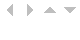

In [35]:
# Generate HTML from tables dataframe
html_table = df.to_html()
html

In [40]:

timeline = {
    "title": ["Perserverence Rover Launch", "Cruise: 292,526,838 Miles", "Descent and Landing", "Surface Operations"],
    "img_url": ["https://mars.nasa.gov/imgs/mars2020/launch/liftoff-launch.jpg", 
                "https://mars.nasa.gov/layout/mars2020/images/cruise/NASAeyes_Mars2020_cruise_clip_v2.jpg",
                   "https://mars.nasa.gov/imgs/mars2020/mars2020-sky-crane.jpg",
                       "https://mars.nasa.gov/imgs/mars2020/Mars2020-Depot-Caching-animated.gif"],
            }
df = pd.DataFrame(timeline)
df

,title,img_url
0,Perserverence Rover Launch,https://mars.nasa.gov/imgs/mars2020/launch/lif...
1,"Cruise: 292,526,838 Miles",https://mars.nasa.gov/layout/mars2020/images/c...
2,Descent and Landing,https://mars.nasa.gov/imgs/mars2020/mars2020-s...
3,Surface Operations,https://mars.nasa.gov/imgs/mars2020/Mars2020-D...
